<a href="https://colab.research.google.com/github/smartaces/OpenAI_Swarms_Live_Flight_Status_Checker_API_Calling_Airline_Assistant/blob/main/OpenAI_Swarms_Flights_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OpenAI Agentic Swarms Live Flight Status Assistant (From AviationStack Web API)**

*   This demo expands upon the OpenAI flight assistant example by adding in live flight status information retrieval from a flight checking API service. It allows you to obtain a list of live fight statuses by giving the assistant the names of an airline and departure and arrival destinations.

*   You will need an OpenAI key and a Aviation Stack API key (https://aviationstack.com/)

# **Connect with Me**

*   If you like this notebook or in any way found it helpful, feel free to connect with me on LinkedIn here: https://www.linkedin.com/in/james-bentley-1b329214/

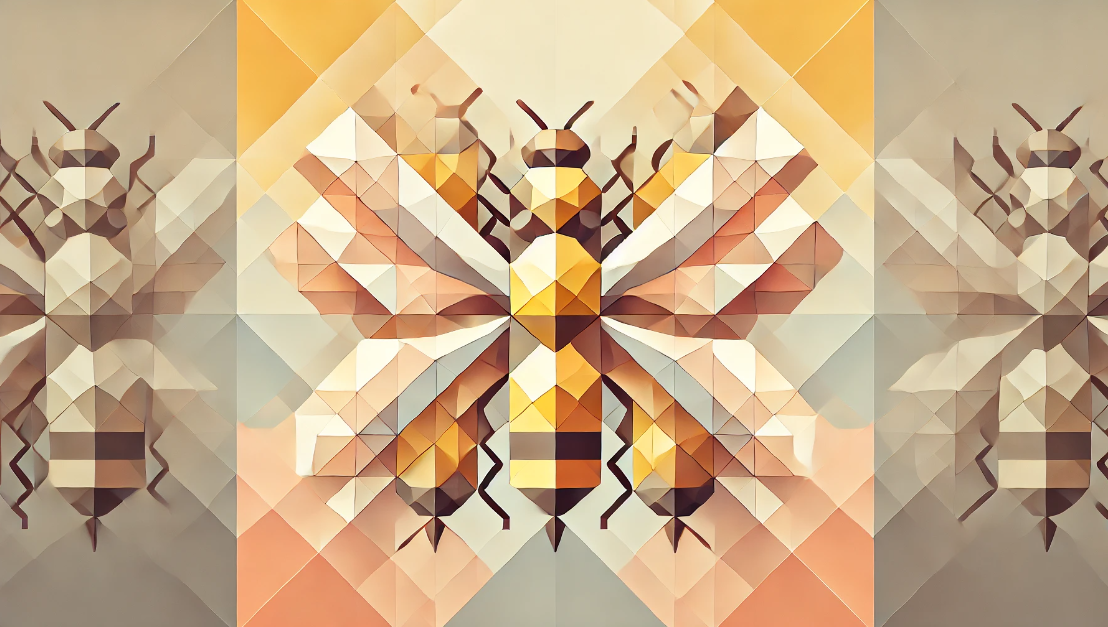

# **If You Like This Please Leave A Github Star and Check Out**

*   My OpenAI agentic swarms basic demos notebook available here: https://github.com/smartaces/openai_agentic_swarms_live_webapi_chat_assistant

*   My OpenAI agentic swarms flight, car salesman, and personal shopper assistant demo notebook here: https://github.com/smartaces/openai_agentic_swarms_live_webapi_chat_assistant/blob/main/Shared_OpenAI_Swarm_Multi_API_Agent_Example.ipynb

# **Step1: Installs OpenAI python library**

First we need to install the OpenAI python Library and respective files from the OpenAI swarms github.

In [1]:
#installs
!pip install numpy openai>=1.33.0 pytest requests tqdm pre-commit instructor --quiet

In [2]:
!pip install git+https://github.com/openai/swarm.git --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# **Step 2: Set Your OpenAI Key**

To use this notebook and build your solution you will need...


*   An OpenAI user account and API Key (with billing set up)
*   Access to the o1 models (this may or may not be available to you yet)
*   As pictured below add this to your Google Secrets (see the key icon on the left panel) inserting your key in the 'value' field and assigning the following name
*   Key name: openai_key
*   Once that is done, run the below cell[link text](https://), granting key access to the notebook access if prompted




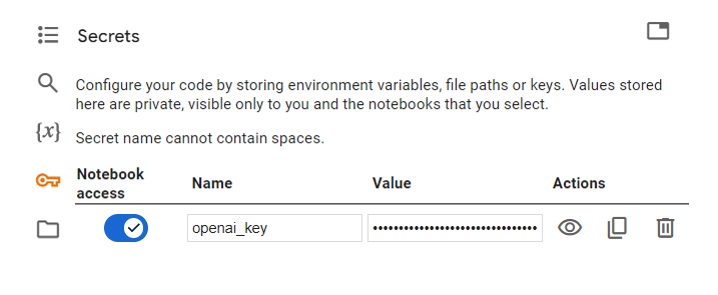


In [3]:
import os
from openai import OpenAI
from google.colab import userdata
from swarm import Swarm, Agent

# Retrieve your OpenAI API key from Google Colab Secrets
openai_key = userdata.get('openai_key')

# Set the OpenAI API key as an environment variable
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the Swarm client
client = Swarm()

# **Step 3: Add in Your AviationStack API Key**

*   This demo calls live flight data from a webservice called AviationStack, you can sign up for a free account here: https://aviationstack.com/signup/free

*   There are usage limits for free plans so be sure to check them. But for the purpose of this demo the free plan will be more than enough.

*   Once you have obtained your API key add it into the Colab secrets section as follows

*   API Key Name: aviation_stack

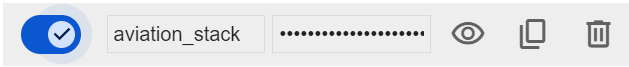


#**Clone The Swarm Github**

In [4]:
! git clone https://github.com/openai/swarm.git --quiet

#**Now Let's Add A List of Airlines and Airport Codes**

*   The below two cells add a folder and file to the OpenAI Airline Assistant example, the file below contains a list of airlines and international airports with 3 digit codes. These three digit codes are what the assistant uses during their conversation with you to send a query to the aviationstack API.

*   There is a whole bunch more we could do with the aviationstack API,  but for the purpose of this demo we'll keep it simple.

In [5]:
import os

# Define the directory path
directory_path = "/content/swarm/examples/airline/data/reference"

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)


In [6]:
# Now use %%writefile to write to the file
%%writefile /content/swarm/examples/airline/data/reference/codes.py

# File: /content/swarm/examples/airline/data/reference/codes.py

# Dictionary of airline codes
airline_codes = {
    "british airways": "BA",
    "qatar airways": "QR",
    "singapore airlines": "SQ",
    "air new zealand": "NZ",
    "china southern airlines": "CZ",
    "silk way west": "7L",
    "united airlines": "UA",
    "eva air": "BR",
    "bangkok airways": "PG",
    "japan airlines": "JL",
    "finnair": "AY",
    "lufthansa": "LH",
    "aircalin": "SB",
    "air france": "AF",
    "sichuan airlines": "3U",
    "china postal airlines": "CF",
    "central airlines": "I9",
    "ana": "NH",
    "hong kong express": "UO",
    "airasia": "AK",
    "emirates": "EK",
    "cathay pacific": "CX",
    "mongolian airlines": "OM",
    "flexflight": "W2",
    "tianjin air cargo": "HT",
    "yto cargo airlines": "YG",
    "sf airlines": "O3",
    "vietjet air": "VJ",
    "swiss": "LX",
    "virgin australia": "VA",
    "vistara": "UK",
    "turkish airlines": "TK",
    "sas": "SK",
    "american airlines": "AA",
    "qantas": "QF",
    "suparna airlines": "Y8",
    "oman air": "WY"
}

# Dictionary of airport codes
airport_codes = {
    "noibai international": "HAN",
    "doha international": "DOH",
    "essendon": "MEB",
    "albury": "ABX",
    "incheon": "ICN",
    "heydar aliyev international": "GYD",
    "hawkes bay": "NPE",
    "auckland international": "AKL",
    "nadi international": "NAN",
    "nauru international": "INU",
    "singapore changi": "SIN",
    "queenstown": "ZQN",
    "dushanbe": "DYU",
    "tolmachevo": "OVB",
    "tontouta": "NOU",
    "kuala lumpur international airport": "KUL",
    "chongqing jiangbei international": "CKG",
    "changsha": "CSX",
    "zhengzhou": "CGO",
    "kansai international": "KIX",
    "shenzhen": "SZX",
    "beijing capital international": "PEK",
    "qingdao": "TAO",
    "vancouver international": "YVR",
    "brisbane international": "BNE",
    "hong kong international": "HKG",
    "guangzhou baiyun international": "CAN",
    "shanghai pudong international": "PVG",
    "charles de gaulle": "CDG",
    "weifang": "WEF",
    "nanjing lukou international airport": "NKG",
    "weihai": "WEH",
    "nanning": "NNG",
    "tan son nhat international": "SGN",
    "mingaladon": "RGN",
    "suvarnabhumi international": "BKK",
    "indira gandhi international": "DEL",
    "madras international": "MAA",
    "lishe international airport": "NGB",
    "christchurch international": "CHC",
    "melbourne tullamarine airport": "MEL",
    "sydney kingsford smith airport": "SYD",
    "tianjin binhai international": "TSN",
    "hangzhou": "HGH",
    "hartsfield-jackson atlanta international": "ATL",
    "los angeles international": "LAX",
    "dubai international": "DXB",
    "tokyo haneda": "HND",
    "o'hare international": "ORD",
    "heathrow": "LHR",
    "dallas/fort worth international": "DFW",
    "schiphol": "AMS",
    "frankfurt": "FRA",
    "istanbul": "IST",
    "john f. kennedy international": "JFK",
    "denver international": "DEN",
    "adolfo suárez madrid–barajas": "MAD",
    "mccarran international": "LAS",
    "san francisco international": "SFO",
    "seattle-tacoma international": "SEA",
    "charlotte douglas international": "CLT",
    "newark liberty international": "EWR",
    "orlando international": "MCO",
    "barcelona–el prat": "BCN",
    "toronto pearson international": "YYZ",
    "gatwick": "LGW",
    "munich": "MUC",
    "miami international": "MIA",
    "george bush intercontinental": "IAH",
    "leonardo da vinci–fiumicino": "FCO",
    "abu dhabi international": "AUH",
    "beijing daxing international": "PKX",
    "Ben gurion international": "TLV",
    "berlin brandenburg": "BER",
    "brasilia international": "BSB",
    "cairo international": "CAI",
    "cancun international": "CUN",
    "changi international terminal 5": "XSP",
    "chengdu tianfu international": "TFU",
    "copenhagen kastrup": "CPH",
    "dalian international": "DLC",
    "delhi indira gandhi terminal 3": "DEL",
    "doha hamad international": "DOH",
    "dublin international": "DUB",
    "dusseldorf international": "DUS",
    "geneva international": "GVA",
    "guadalajara international": "GDL",
    "guangzhou baiyun terminal 3": "CAN",
    "helsinki vantaa": "HEL",
    "incheon terminal 2": "ICN",
    "jakarta soekarno-hatta": "CGK",
    "jeddah king abdulaziz": "JED",
    "johannesburg or tambo": "JNB",
    "kansai terminal 2": "KIX",
    "kiev boryspil": "KBP",
    "kuching international": "KCH",
    "kunming changshui": "KMG",
    "kuwait international": "KWI",
    "lima jorge chavez": "LIM",
    "lisbon portela": "LIS",
    "manchester terminal 2": "MAN",
    "manila ninoy aquino": "MNL",
    "melbourne avalon": "AVV",
    "mexico city benito juarez": "MEX",
    "milan malpensa": "MXP",
    "moscow sheremetyevo": "SVO",
    "mumbai chhatrapati shivaji": "BOM",
    "nagoya centrair": "NGO",
    "oslo gardermoen": "OSL",
    "paris orly": "ORY",
    "perth international": "PER",
    "phnom penh international": "PNH",
    "prague vaclav havel": "PRG",
    "riyadh king khalid": "RUH",
    "rome ciampino": "CIA",
    "santiago arturo merino benitez": "SCL",
    "seoul gimpo": "GMP",
    "stockholm arlanda": "ARN",
    "tel aviv ben gurion": "TLV",
    "vienna schwechat": "VIE",
    "zurich kloten": "ZRH"
}


Writing /content/swarm/examples/airline/data/reference/codes.py


# **Now Let's Update the OpenAI Swarms Airline Assistant Example So It Can Run The Flight Status Checks**

In [7]:
%%writefile /content/swarm/examples/airline/configs/tools.py

from google.colab import userdata
import requests

def escalate_to_agent(reason=None):
    return f"Escalating to agent: {reason}" if reason else "Escalating to agent"

def valid_to_change_flight():
    return "Customer is eligible to change flight"

def change_flight():
    return "Flight was successfully changed!"

def initiate_refund():
    status = "Refund initiated"
    return status

def initiate_flight_credits():
    status = "Successfully initiated flight credits"
    return status

def case_resolved():
    return "Case resolved. No further questions."

def initiate_baggage_search():
    return "Baggage was found!"

def check_flight_status(airline_iata, dep_iata=None, arr_iata=None):
    """Make the API call once we have confirmed codes"""
    api_key = userdata.get('aviation_stack')
    base_url = f"http://api.aviationstack.com/v1/flights?access_key={api_key}&limit=3"

    params = []
    if airline_iata:
        params.append(f"airline_iata={airline_iata}")
    if dep_iata:
        params.append(f"dep_iata={dep_iata}")
    if arr_iata:
        params.append(f"arr_iata={arr_iata}")

    url = base_url + '&' + '&'.join(params) if params else base_url

    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json().get('data', [])
    except Exception as e:
        return []

Overwriting /content/swarm/examples/airline/configs/tools.py


In [8]:
#updated agents.py to clean up tool calls

%%writefile /content/swarm/examples/airline/configs/agents.py

from configs.tools import *
from data.routines.baggage.policies import *
from data.routines.flight_modification.policies import *
from data.routines.prompts import STARTER_PROMPT
from data.reference.codes import airline_codes, airport_codes
from swarm import Agent

def transfer_to_flight_modification():
    return flight_modification

def transfer_to_flight_cancel():
    return flight_cancel

def transfer_to_flight_change():
    return flight_change

def transfer_to_lost_baggage():
    return lost_baggage

def transfer_to_flight_status():
    return flight_status

def transfer_to_triage():
    return triage_agent

def triage_instructions(context_variables):
    customer_context = context_variables.get("customer_context", None)
    flight_context = context_variables.get("flight_context", None)
    return f"""You are to triage a users request, and call a tool to transfer to the right intent.

    For flight status requests: If user asks about checking, finding, or looking up flights,
    transfer to flight status agent using transfer_to_flight_status.

    You dont need to know specifics, just the topic of the request.
    When you need more information to triage the request to an agent, ask a direct question without explaining why you're asking it.
    Do not share your thought process with the user! Do not make unreasonable assumptions on behalf of user.
    The customer context is here: {customer_context}, and flight context is here: {flight_context}"""

flight_status = Agent(
    name="Flight Status Agent",
    instructions=f"""You are a flight status checking assistant for Flight Airlines.

You have access to these specific lists of airports and airlines in these reference dictionaries:

Airport Codes Dictionary:
{airport_codes}

Airline Codes Dictionary:
{airline_codes}

Follow these steps EXACTLY when handling flight status requests:
1. Look for airports and airlines mentioned in user messages
2. Compare ONLY against the provided reference dictionaries
3. If multiple matches exist, present ALL options to the user
4. Confirm each piece of information before proceeding
5. Only proceed with flight check once all codes are confirmed

Example conversation flow:
User: "Check flights from London to Auckland"
Assistant: "I see you want to check flights to Auckland International (AKL). For London, did you mean Heathrow (LHR) or Gatwick (LGW)?"
User: "Gatwick"
Assistant: "Which airline would you like to check?"
User: "British Airways"
Assistant: "To confirm, you want to check British Airways (BA) flights from London Gatwick (LGW) to Auckland International (AKL)?"

IMPORTANT:
- Never assume codes - always confirm with user
- Present all possible matches when multiple exist
- Get explicit confirmation for each detail
- Do not proceed until all necessary information is confirmed

If user requests shift to different topics (baggage, cancellation, etc), call transfer_to_triage.
If user demands human agent, call escalate_to_agent.""",
    functions=[
        check_flight_status,
        transfer_to_triage,
        escalate_to_agent,
        case_resolved
    ],
)

triage_agent = Agent(
    name="Triage Agent",
    instructions=triage_instructions,
    functions=[
        transfer_to_flight_modification,
        transfer_to_lost_baggage,
        transfer_to_flight_status,
    ],
)

flight_modification = Agent(
    name="Flight Modification Agent",
    instructions="""You are a Flight Modification Agent for a customer service airlines company.
    You are an expert customer service agent deciding which sub intent the user should be referred to.
    You already know the intent is for flight modification related question. First, look at message history and see if you can determine if the user wants to cancel or change their flight.
    Ask user clarifying questions until you know whether or not it is a cancel request or change flight request. Once you know, call the appropriate transfer function. Either ask clarifying questions, or call one of your functions, every time.""",
    functions=[transfer_to_flight_cancel, transfer_to_flight_change],
    parallel_tool_calls=False,
)

flight_cancel = Agent(
    name="Flight cancel traversal",
    instructions=STARTER_PROMPT + FLIGHT_CANCELLATION_POLICY,
    functions=[
        escalate_to_agent,
        initiate_refund,
        initiate_flight_credits,
        transfer_to_triage,
        case_resolved,
    ],
)

flight_change = Agent(
    name="Flight change traversal",
    instructions=STARTER_PROMPT + FLIGHT_CHANGE_POLICY,
    functions=[
        escalate_to_agent,
        change_flight,
        valid_to_change_flight,
        transfer_to_triage,
        case_resolved,
    ],
)

lost_baggage = Agent(
    name="Lost baggage traversal",
    instructions=STARTER_PROMPT + LOST_BAGGAGE_POLICY,
    functions=[
        escalate_to_agent,
        initiate_baggage_search,
        transfer_to_triage,
        case_resolved,
    ],
)

Overwriting /content/swarm/examples/airline/configs/agents.py


In [9]:
#some styling
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# **This Next Cell Is Optional: Turn Off Debug Mode**

*   Debug mode allows you to see all the actions the Swarm Assistants make behind the scenes, it's super useful so you may want to keep it on. If you are just interested in seeing a clean conversation then you can switch Debug mode to 'False' (so turned off) by running the below cell.

The key line of code which controls this is...

*Debug Mode Switched Off:*

```
# run_demo_loop(triage_agent, context_variables=context_variables, debug=False)
```

*Debug Mode Switched On:*

```
# run_demo_loop(triage_agent, context_variables=context_variables, debug=True)
```

In [10]:
#updated main.py to switch off debug code

%%writefile /content/swarm/examples/airline/main.py

from configs.agents import *
from swarm.repl import run_demo_loop

context_variables = {
    "customer_context": """Here is what you know about the customer's details:
1. CUSTOMER_ID: customer_12345
2. NAME: John Doe
3. PHONE_NUMBER: (123) 456-7890
4. EMAIL: johndoe@example.com
5. STATUS: Premium
6. ACCOUNT_STATUS: Active
7. BALANCE: $0.00
8. LOCATION: 1234 Main St, San Francisco, CA 94123, USA
""",
    "flight_context": """The customer has an upcoming flight from LGA (Laguardia) in NYC to LAX in Los Angeles.
The flight # is 1919. The flight departure date is 3pm ET, 5/21/2024.""",
}
if __name__ == "__main__":
    run_demo_loop(triage_agent, context_variables=context_variables, debug=False)


Overwriting /content/swarm/examples/airline/main.py


# **Now Let's Chat To The Assistant and Get Some Flight Status Updates**

*   Run the below cell to chat to the assistant.
*   To get it to run a flight status check, simply ask it to check flight statuses.
*   You will then be asked to provide a departure and arrival airport and an airline.
*   The assistant will then use these to check for their respective 3 digit codes (which are needed to check the statuses via AviationStack).

In [12]:
%run /content/swarm/examples/airline/main.py

Starting Swarm CLI 🐝
User: hello
Triage Agent: Hello! How can I assist you today?
User: i'd like a flight status please
Triage Agent: transfer_to_flight_status()
Flight Status Agent: Sure! I can help you check the flight status. Could you please provide me with the departure airport, arrival airport, and airline you are interested in?
User: paris to berlin
Flight Status Agent: I see you're looking to check flights from Paris to Berlin. For Paris, did you mean Charles de Gaulle (CDG) or Paris Orly (ORY)? And for Berlin, are you referring to Berlin Brandenburg (BER)?
User: de gaulle and ber
Flight Status Agent: Great, you want to check flights from Charles de Gaulle (CDG) to Berlin Brandenburg (BER). 

Which airline would you like to check for? Here are some options to consider:
- Air France
- Lufthansa
- EasyJet

Let me know your choice!
User: air france
Flight Status Agent: To confirm, you want to check Air France (AF) flights from Charles de Gaulle (CDG) to Berlin Brandenburg (BER). I

KeyboardInterrupt: Interrupted by user

# **Example Conversation**

Here is an example conversation with the flight status checking agent:

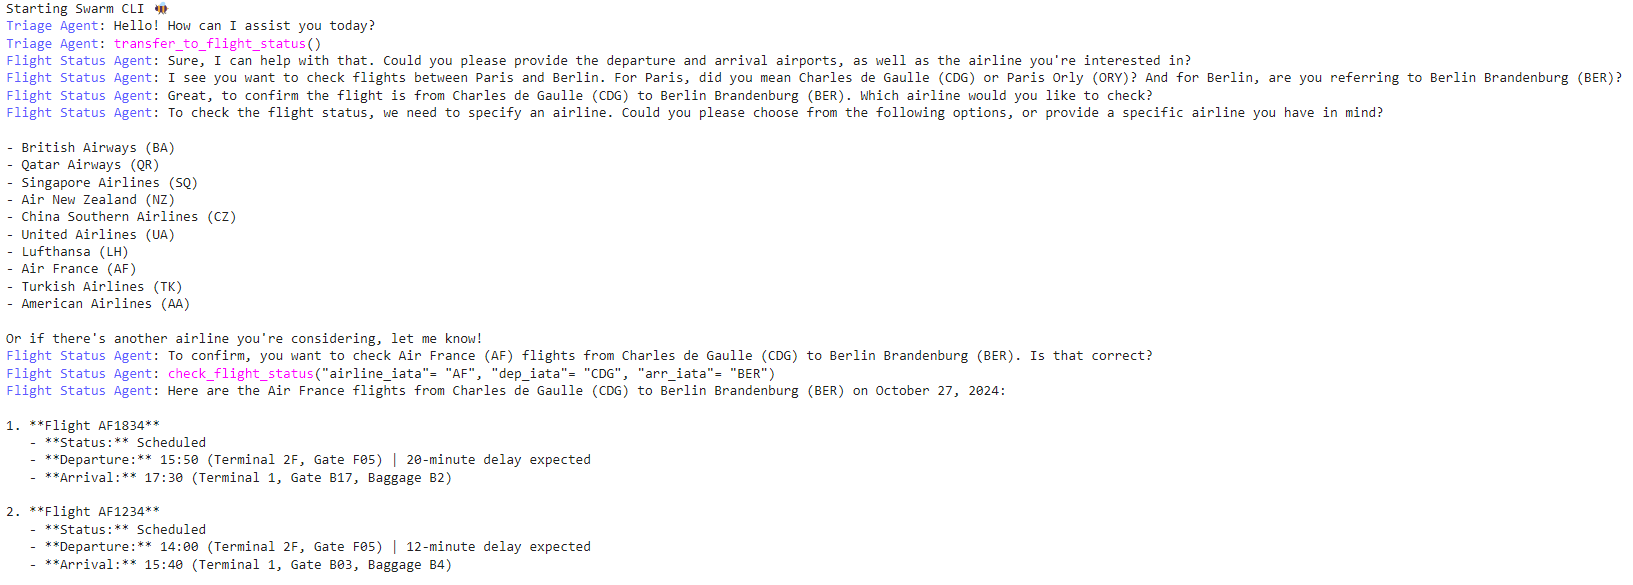

# **Other Agents in This Example**

Below are the original agentic flows in this example as created by OpenAI

*   Triage Agent: Determines the type of request and transfers to the appropriate agent.

*   Flight Modification Agent: Handles requests related to flight modifications, further triaging them into:

*   Flight Cancel Agent: Manages flight cancellation requests.

*   Flight Change Agent: Manages flight change requests.

*   Lost Baggage Agent: Handles lost baggage inquiries.

How the agent handles your questions will depend on the inputs you provide... here are the details they have on file for you for this hypothetical scenario

1. CUSTOMER_ID: customer_12345
2. NAME: John Doe
3. PHONE_NUMBER: (123) 456-7890
4. EMAIL: johndoe@example.com
5. STATUS: Premium
6. ACCOUNT_STATUS: Active
7. BALANCE: $0.00
8. LOCATION: 1234 Main St, San Francisco, CA 94123, USA
""",
    "flight_context": """The customer has an upcoming flight from LGA (Laguardia) in NYC to LAX in Los Angeles.
The flight # is 1919. The flight departure date is 3pm ET, 5/21/2024."""

If you want to see the respective rules governing how the agents will respond to your requests for flight cancellations, changes and lost baggage, navigate the swarms folder to your left...

* Baggage policy instructions for agent: /content/swarm/examples/airline/data/routines/baggage/policies.py

* Flight modification policy instructions for agent: /content/swarm/examples/airline/data/routines/flight_modification/policies.py

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.

### **Airline Agent Evaluations**

So the airline agent also includes toy evaluations, that provide insights on the agents behaviour, activities and performance. However the out of the box scipt from OpenAI doesn't work in Colab, so it needs a minor amendment.

Run the below cell and in automatically modifies the necessary part, and then run the cell below to launch a dummy evaluation.


In [ ]:
%%writefile /content/swarm/examples/airline/evals/function_evals.py

import json
import os
import sys

# Adding the necessary paths to sys.path
sys.path.append("/content/swarm")
sys.path.append("/content/swarm/examples/airline")

# Import the module after appending the correct paths
from evals.eval_utils import run_function_evals
from configs.agents import triage_agent, flight_modification

# Absolute paths to the JSON files and evaluation results
triage_test_cases = "/content/swarm/examples/airline/evals/eval_cases/triage_cases.json"
flight_modification_cases = "/content/swarm/examples/airline/evals/eval_cases/flight_modification_cases.json"
eval_results_dir = "/content/swarm/examples/airline/evals/eval_results"
triage_eval_path = f"{eval_results_dir}/triage_evals.json"
flight_modification_eval_path = f"{eval_results_dir}/flight_modification_evals.json"

n = 5

if __name__ == "__main__":
    # Check current working directory for debugging
    print("Current working directory:", os.getcwd())

    # Run triage_agent evals
    with open(triage_test_cases, "r") as file:
        triage_test_cases = json.load(file)

    run_function_evals(
        triage_agent,
        triage_test_cases,
        n,
        eval_path=triage_eval_path,
    )

    # Run flight modification evals
    with open(flight_modification_cases, "r") as file:
        flight_modification_cases = json.load(file)

    run_function_evals(
        flight_modification,
        flight_modification_cases,
        n,
        eval_path=flight_modification_eval_path,
    )

*   Now you can run the evaluations script...

In [ ]:
#run the example evals

%run /content/swarm/examples/airline/evals/function_evals.py

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.